In [12]:
#mnist 파일(tensorflow 공식 파일) 불러오기
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


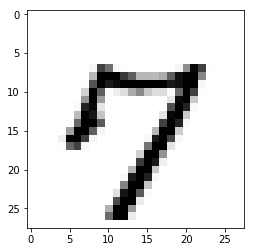

In [9]:
#데이터 운용
import numpy 
import matplotlib.pyplot as plt
all_values = mnist.train.next_batch(1)[0][0]
target_label = mnist.train.next_batch(1)[1]
print(target_label)
image_array = numpy.asfarray(all_values[0:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation='None')

5444
0


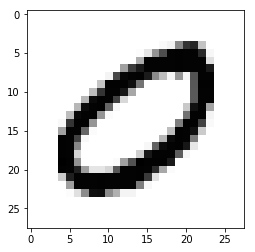

In [49]:
# mnist 데이터중 원하는 숫자의 데이터 분류
list_test = []
for i in range(mnist.train.num_examples):
    if mnist.train.labels[i][0] == 1:
        list_test.append(mnist.train.images[i])
print(len(list_))
all_values = list_[10]
target_label = 0
print(target_label)
image_array = numpy.asfarray(all_values[0:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation='None')

In [19]:
# tensorflow를 이용한 학습(94% ~96%)(epoch = 20)(2개의 은닉층)
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
learning_rate = 0.001
training_epochs = 10
batch_size = 100 
display_step = 1
X = tf.placeholder(tf.float32, [None, 784]) 
Y = tf.placeholder(tf.float32, [None, 10]) 

W1 = tf.Variable(tf.random_normal([784, 256]))
W2 = tf.Variable(tf.random_normal([256, 256]))
W3 = tf.Variable(tf.random_normal([256,  10]))

B1 = tf.Variable(tf.random_normal([256]))
B2 = tf.Variable(tf.random_normal([256]))
B3 = tf.Variable(tf.random_normal([ 10]))

L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), B1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), B2)) 
hypothesis = tf.add(tf.matmul(L2, W3), B3)    

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis,labels = Y))   # softmax loss

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 134.089508466
Epoch: 0002 cost= 37.342779266
Epoch: 0003 cost= 23.433712347
Epoch: 0004 cost= 16.288309386
Epoch: 0005 cost= 11.895784855
Epoch: 0006 cost= 8.916098115
Epoch: 0007 cost= 6.634470371
Epoch: 0008 cost= 5.047005059
Epoch: 0009 cost= 3.804668511
Epoch: 0010 cost= 2.941433056
Accuracy: 0.9379


In [10]:
#전이학습검증을 위한 변형코드(test 사진에 대하여 참 거짓 판별)(미완)
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# 테스트용 n 손글씨 집합(list1 : 0,1,2,3,4 ; list2 : 5,6,7,8,9)
data_train_1 = []
data_test_1 = []
for i in range(mnist.train.num_examples):
    if mnist.train.labels[i].index(1) < 5 :
        data_train_1.append(mnist.train.images[i])
        data_test_1.append(mnist.train.images[i])
data_train_2 = []
data_test_2 = []
for i in range(mnist.train.num_examples):
    if mnist.train.labels[i].index(1) > 4 :
        data_train_2.append(mnist.train.images[i])
        data_test_2.append(mnist.train.images[i])
#var and func reset-----------------------------
learning_rate = 0.001
training_epochs = 20
batch_size = 100 
display_step = 1
X = tf.placeholder(tf.float32, [None, 784]) 
Y = tf.placeholder(tf.float32, [None, 10]) 
# Common Weight
W1 =  tf.Variable(tf.random_normal([784, 256]))
W2 =  tf.Variable(tf.random_normal([256, 256]))
W3 =  tf.Variable(tf.random_normal([256,  5]))
#Weight_nueral_1,2 reset
W1_1 , W2_1 , W3_1 = W1 , W2 , W3
W1_2 , W2_2 , W3_2 = W1 , W2 , W3

#Common Deflection 
B1 = tf.Variable(tf.random_normal([256]))
B2 = tf.Variable(tf.random_normal([256]))
B3 = tf.Variable(tf.random_normal([ 5]))
#Weight_nueral_1,2 reset
B1_1 , B2_1 , B3_1 = B1 , B2 , B3
B1_2 , B2_2 , B3_2 = B1 , B2 , B3
# func 
L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), B1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), B2)) 
hypothesis = tf.add(tf.matmul(L2, W3), B3)    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis,labels = Y))   # softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#------------------------------------
#train_1()
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(data_train_1)/batch_size)
        for i in range(total_batch):
            data_train, data_test = data_train_1[100*i:100*i+100] , data_test[100*i:100*i+100]
            _, c = sess.run([optimizer, cost], feed_dict={X: data_train, Y: data_test})
            avg_cost += c / total_batch
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

SyntaxError: invalid syntax (<ipython-input-10-93c2f31642ae>, line 9)

[1, 2, 3]